In [1]:
import sys
sys.path.append("../")
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from Linearity import Neuron
from IPython.display import set_matplotlib_formats
import scipy.stats as ss
set_matplotlib_formats('pdf', 'png')
plt.style.use('seaborn-notebook')
# load libraries and set plot parameters
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 8, 8
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

## 1 C (CA3 heatmap)

In [2]:
ca3_neuron = Neuron.load('/media/sahil/NCBS_Shares_BGStim/patch_data/160927/c4_CA3_CPP/plots/c4_CA3_CPP.pkl')

In [3]:
AP_dict = np.zeros((12,12))
for expType, exp in ca3_neuron:
    if expType == "Control":
        for coord in exp[1].coordwise:
            temp_coord = []
            for trial in exp[1].coordwise[coord].trials:
                temp_coord.append(trial.AP_flag)
            AP_dict[list(coord)[0]] = np.average(temp_coord)

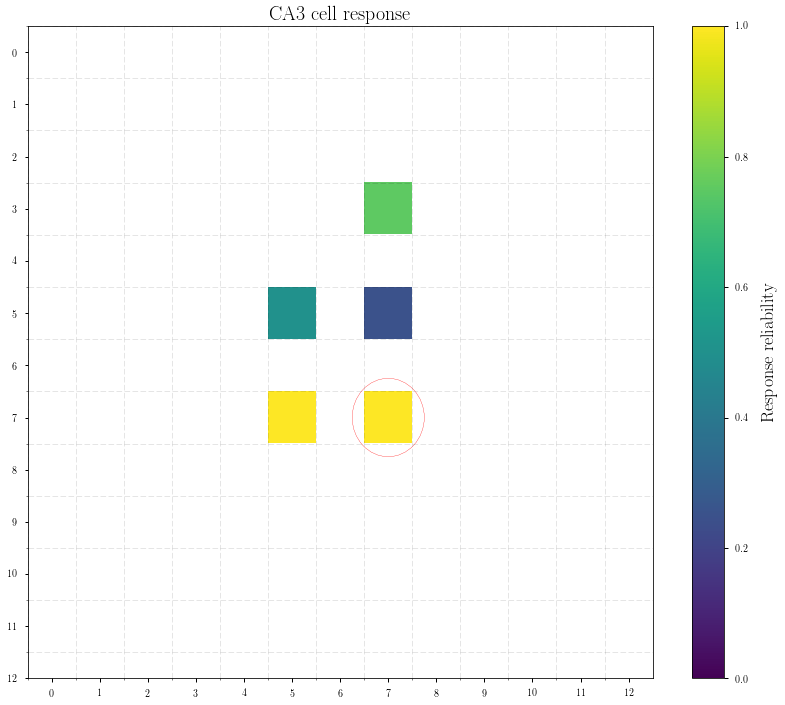

In [4]:
AP_dict = np.ma.masked_where(AP_dict == 0., AP_dict)
cmap = plt.cm.viridis
cmap.set_bad(color='white')

fig, ax = plt.subplots()
heatmap = ax.pcolormesh(AP_dict, cmap=cmap, vmin=0., vmax =1.)

#mark a specific square?
# zeros = np.zeros((12,12))
# zeros[7,7] = 1.
# c = np.ma.masked_array(zeros, zeros == 0.)  # mask squares where value == 1
# ax.pcolormesh(np.arange(13), np.arange(13), c, alpha=1.0, zorder=2, facecolor='none', edgecolors='k',
#                cmap='gray')
circle1 = plt.Circle((7.5, 7.5), 0.75, color='r', fill=False)

ax.set_title("CA3 cell response")
ax.invert_yaxis()
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_ticks(np.arange(13), minor=True)
    axis.set(ticks=np.arange(13)+0.5, ticklabels=np.arange(13))

ax.grid(True, which='minor', axis='both', linestyle='--', alpha=0.1, color='k')

ax.set_xlim((0,13))
ax.set_xlim((0,13))
cbar = plt.colorbar(heatmap, label="Response reliability")
cbar.ax.get_yaxis().labelpad = 15
ax.add_artist(circle1)
fig.set_figheight(12)
fig.set_figwidth(14)

plt.show()

## 1 D (CA3 jitter)

1.93632988824


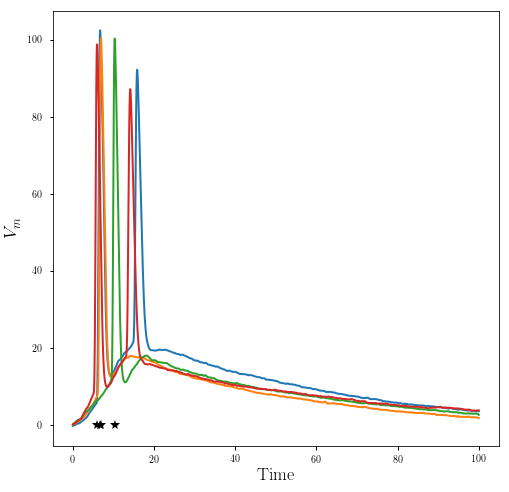

In [5]:
fig, ax = plt.subplots()
AP_dict = np.zeros((12,12))
tsp = []
for expType, exp in ca3_neuron:
    if expType == "Control":
        for trial in exp[1].coordwise[frozenset([(7,7)])].trials:
            time = np.linspace(0,100,len(trial.interestWindow))
            ax.plot(time, trial.interestWindow)
            tsp.append(time[np.argmax(trial.interestWindow)])
ax.set_xlabel("Time")
ax.set_ylabel("$V_m$")
ax.plot(tsp, [0]*len(tsp), 'k*', markersize=10)
print(np.std(tsp, ddof = 1))
plt.show()

## 1 E (CA3 jitter distribution)

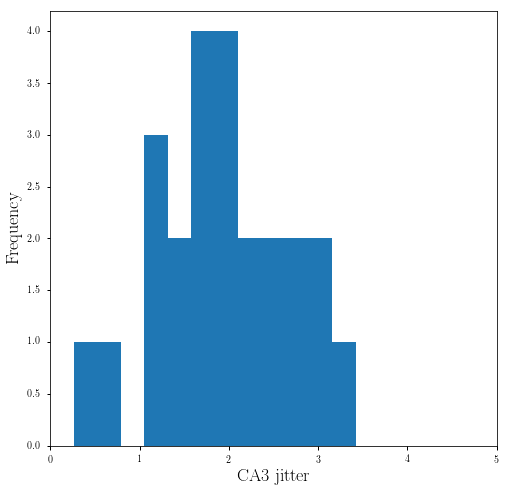

In [6]:
fig, ax = plt.subplots()
AP_dict = np.zeros((12,12))
jitter = []
for expType, exp in ca3_neuron:
    if expType == "Control":
        for coord in exp[1].coordwise:
            tsp = []
            for trial in exp[1].coordwise[coord].trials:
                time = np.linspace(0,100,len(trial.interestWindow))
                tsp.append(time[np.argmax(trial.interestWindow)])
            jitter.append(np.std(tsp, ddof = 1))
ax.set_xlabel("CA3 jitter")
ax.set_ylabel("Frequency")
bins = np.linspace(0,5,20)
ax.hist(jitter, bins=bins)
ax.set_xlim((0,5))
plt.show()

## 1 F (CA1 heatmap)

In [7]:
neuronList = []
ca1_neuron = Neuron.load('/media/sahil/NCBS_Shares_BGStim/patch_data/161013/c1/plots/c1.pkl')

In [8]:
coordwise = ca1_neuron.experiment["Control"][1].coordwise
epsp_dict = np.zeros((12,12))

for coord in coordwise:
    epsp_dict[list(coord)[0]] = coordwise[coord].average_feature[0]

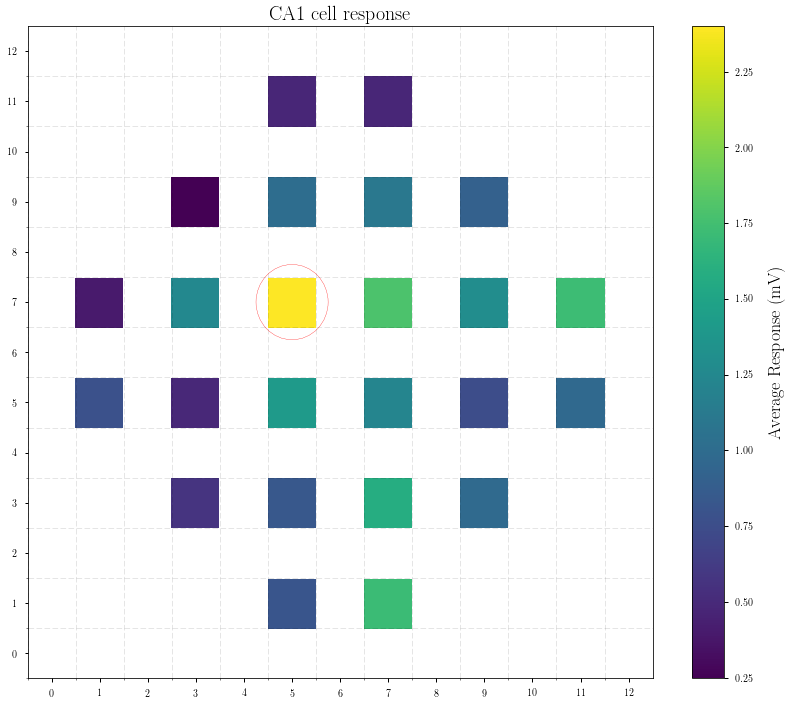

In [9]:
epsp_dict = np.ma.masked_where(epsp_dict == 0., epsp_dict)
cmap = plt.cm.viridis
cmap.set_bad(color='white')

fig, ax = plt.subplots()
heatmap = ax.pcolormesh(epsp_dict, cmap=cmap)
circle1 = plt.Circle((5.5, 7.5), 0.75, color='r', fill=False)

ax.set_title("CA1 cell response")

ax.invert_yaxis()
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_ticks(np.arange(13), minor=True)
    axis.set(ticks=np.arange(13)+0.5, ticklabels=np.arange(13))

ax.grid(True, which='minor', axis='both', linestyle='--', alpha=0.1, color='k')

ax.set_xlim((0,13))
ax.set_ylim((0,13))
cbar = plt.colorbar(heatmap, label="Average Response (mV)")
cbar.ax.get_yaxis().labelpad = 15
ax.add_artist(circle1)
fig.set_figheight(12)
fig.set_figwidth(14)

plt.show()

## 1 G (CA1 jitter)

3.25367747385


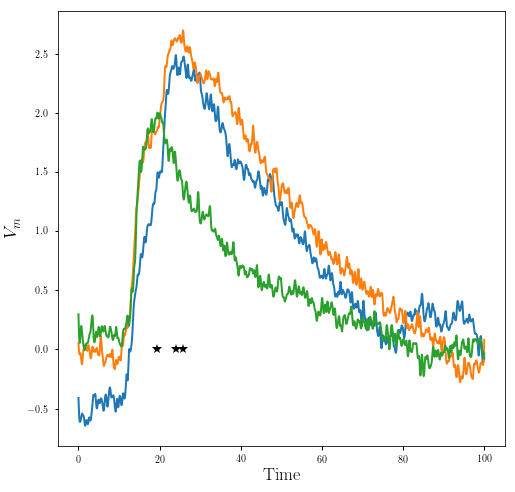

In [10]:
fig, ax = plt.subplots()
tsp = []
for expType, exp in ca1_neuron:
    if expType == "Control":
        for trial in exp[1].coordwise[frozenset([(7,5)])].trials:
            time = np.linspace(0,100,len(trial.interestWindow))
            ax.plot(time, trial.interestWindow)
            tsp.append(time[np.argmax(trial.interestWindow)])
ax.set_xlabel("Time")
ax.set_ylabel("$V_m$")
ax.plot(tsp, [0]*len(tsp), 'k*', markersize=10)
print(np.std(tsp, ddof=1))
plt.show()

## 1 H (CA1 jitter distribution)

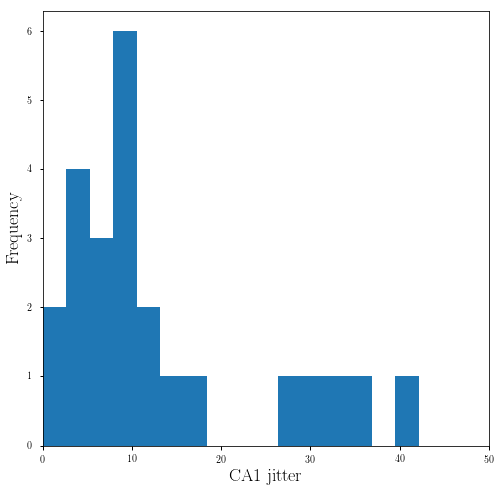

In [11]:
fig, ax = plt.subplots()
ca1_jitter = []
for expType, exp in ca1_neuron:
    if expType == "Control":
        for coord in exp[1].coordwise:
            tsp = []
            for trial in exp[1].coordwise[coord].trials:
                time = np.linspace(0,100,len(trial.interestWindow))
                tsp.append(time[np.argmax(trial.interestWindow)])
            ca1_jitter.append(np.std(tsp, ddof = 1))
ax.set_xlabel("CA1 jitter")
ax.set_ylabel("Frequency")
bins = np.linspace(0,50,20)
ax.hist(ca1_jitter, bins=bins)
ax.set_xlim((0,50))
plt.show()

## 1 I (CA1 amplitude variability )

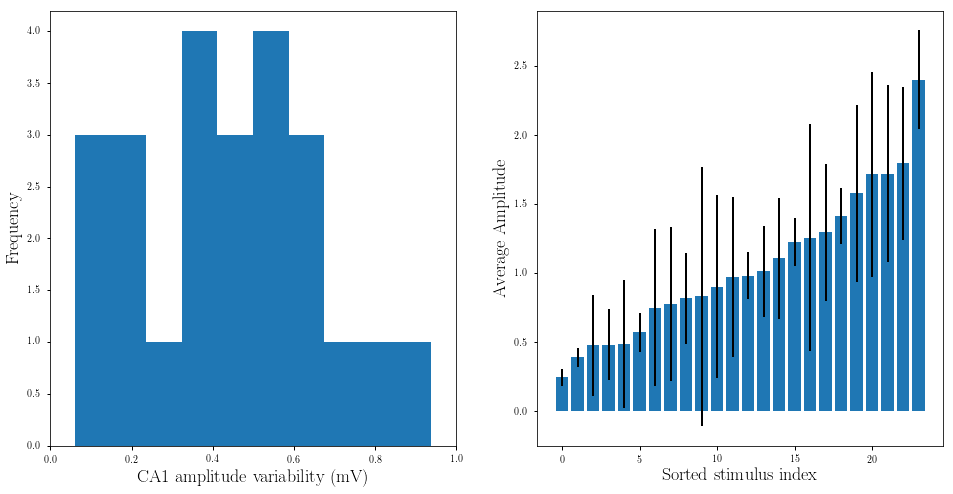

In [27]:
fig, ax = plt.subplots(1,2)
ca1_amp_jitter = []
average_psp = []
for expType, exp in ca1_neuron:
    if expType == "Control":
        for coord in exp[1].coordwise:
            amp = []
            for trial in exp[1].coordwise[coord].trials:
                amp.append(trial.feature[0])
            average_psp.append(exp[1].coordwise[coord].average_feature[0])
            ca1_amp_jitter.append(np.std(amp, ddof = 1))
ax[0].set_xlabel("CA1 amplitude variability (mV)")
ax[0].set_ylabel("Frequency")
bins = 10
ax[0].hist(ca1_amp_jitter, bins=bins)
ax[0].set_xlim((0,1))

average_psp = np.array(average_psp)
indices = np.argsort(average_psp)
ca1_amp_jitter = np.array(ca1_amp_jitter)
ax[1].bar(np.arange(len(average_psp)), average_psp[indices], yerr = ca1_amp_jitter[indices])
ax[1].set_xlabel("Sorted stimulus index")
ax[1].set_ylabel("Average Amplitude")
fig.set_figheight(8)
fig.set_figwidth(16)
plt.show()

Population statistics

In [ ]:
neuronList = []
with open("/media/sahil/NCBS_Shares_BGStim/patch_data/current_clamp_files.txt", 'r') as fp:
    fileList = fp.read().splitlines()
    for i,filename in enumerate(fileList):
        fileList[i] += "plots/" + filename.split('/')[-2] + ".pkl"
        try:
            print ("Reading ", fileList[i])
            neuronList.append(Neuron.load(fileList[i]))
        except:
            print ("Couldn't read", fileList[i])
print ("Read {} files.".format(len(fileList)))

## 1 J (distribution of EPSP one squares)

In [ ]:
def figureJ(feature = 0):
    ''' Get's the fraction of times an AP occurs verus PSPs '''
    epsp_1sq = []
    squares = 1
    feature = 0
    numBins = 200
    for neuron in neuronList:
        try:
            trials = neuron.experiment["Control"][squares].trial
            for trialNum in trials:
                trial = neuron.experiment["Control"][squares].trial[trialNum]
                epsp_1sq.append(trial.feature[feature])
        except:
            print("{}, {}: Out of control?!".format(neuron.index, neuron.date))
    #print (np.mean(epsp_1sq), np.median(epsp_1sq), ss.mode(epsp_1sq))
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(epsp_1sq, bins=numBins)
    maxBin = np.argmax(n)
    modeEPSP = bins[maxBin]
    ymin, ymax = ax.get_ylim()
    ax.vlines(modeEPSP,ymin,ymax, linestyles='--')
    ax.annotate("{:.2f} mV".format(modeEPSP), xy=(modeEPSP, ymax), xytext=(1.2*modeEPSP, ymax), textcoords='data')
    ax.set_xlabel("EPSP Amplitude (mV)")
    ax.set_ylabel("Number of measured responses")
    plt.show()

In [ ]:
figureJ()

## 1 K (Fraction of APs and sublinear responses)

In [ ]:
def figureK(feature = 0):
    ''' Get's the fraction of times an AP occurs verus PSPs '''
    numNeurons = 0
    numAP = 0
    numPSP = 0
    for neuron in neuronList:
        for experiment in neuron.experiment:
            if experiment == "Control":    
                numNeurons+=1
                for squares in neuron.experiment[experiment]:
                    nSq = neuron.experiment[experiment][squares].trial
                    for trialnum in nSq:
                        if nSq[trialnum].AP_flag:
                            numAP+=1
                        else:
                            numPSP+=1
    
    fracAPs = float(numAP)/numPSP
    fig, ax = plt.subplots()
    index = np.arange(2)
    width = 0.5
    ax.bar(index, (numPSP, numAP), width)
    ax.set_title("CA1 responses")
    ax.set_ylabel("Frequency")
    ax.set_xticks(index)
    ax.set_xticklabels(('PSP', 'AP'))
    #ax.set_yticks(list(ax.get_yticks()) + [numAP])
    ax.annotate("{:.2f} \%".format(fracAPs*1e2), xy=(1, numAP*2.0), xytext=(0.95, numAP*2.0), textcoords='data')
    xaxisVal = ax.get_xlim()[0]
    ax.hlines(numAP, xaxisVal, index[1],linestyle="--")
    plt.show()
    print ("Legend text: Number of cells: {}, number of points: {}, fraction of APS: {}".format(numNeurons, numAP+numPSP, fracAPs))

In [ ]:
figureK()